In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [2]:
def visualize_mel_spectrogram(mel_spectrogram, save_path):
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(mel_spectrogram, y_axis='mel', fmax=8000, x_axis='time')
    plt.axis('off')
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

def preprocess_to_mel_spectogram(file_path, save_dir):
    target_shape = (224, 224)
    audio, sample_rate = librosa.load(file_path)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    mel_spectrogram = (mel_spectrogram - np.min(mel_spectrogram)) / (np.max(mel_spectrogram) - np.min(mel_spectrogram))
    mel_spectrogram = np.resize(mel_spectrogram, target_shape)
    subfolder_path = os.path.join(save_dir, os.path.basename(os.path.dirname(file_path)))
    os.makedirs(subfolder_path, exist_ok=True)
    save_name = os.path.join(subfolder_path, os.path.splitext(os.path.basename(file_path))[0] + '.png')
    visualize_mel_spectrogram(mel_spectrogram, save_name)

In [3]:
train_audio_path = "./train_audio/"
target_image_path = "./train_mel_spectogram_images/"

for root, _, files in os.walk(train_audio_path):
        for file in files:
            if file.endswith('.mp3'):
                file_path = os.path.join(root, file)
                preprocess_to_mel_spectogram(file_path, target_image_path)

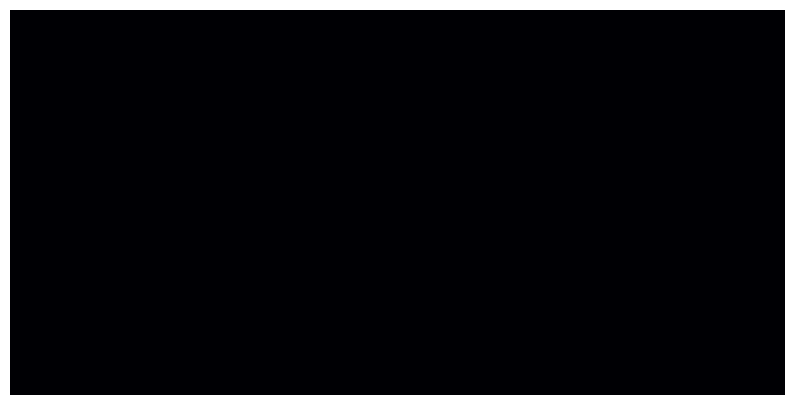

In [4]:
file_path = './train_audio/woothr/XC162079.mp3'
target_shape = (224, 224)
audio, sample_rate = librosa.load(file_path)
mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
mel_spectrogram = (mel_spectrogram - np.min(mel_spectrogram)) / (np.max(mel_spectrogram) - np.min(mel_spectrogram))
mel_spectrogram = np.resize(mel_spectrogram, target_shape)

plt.figure(figsize=(10, 5))
librosa.display.specshow(mel_spectrogram, y_axis='mel', fmax=8000, x_axis='time')
plt.axis('off')
plt.show()